# CISC-481/681 
# Wei Zhang
# Final Project Name: Cat & Dog Identifier
GitHub link:
https://github.com/zwwpaul/CISC481-681_Cat-Dog-Identifier

Google Drive link (Download the dataset here!):
https://drive.google.com/open?id=179tEYoRn_22EInsy4X0_9KrLjWhMTbFC

After you download the data.zip file, to run this program, please put the folder named "data" into Cat_Recognition folder.


The objective of this project is to recognize whether the picture which users give is a cat picture or not.
The main topic is images recognition and the primary deep learning method for this project is Convolutional Neural Networks(CNN).
Supervised learning is one of a model based machine learning to mainly solve two types of problems: Regression and Classification.
Its model is trained by "correct" data, and the pre-trained model can be used to predict/produce more and more "correct" answers.CNNs are generally used for surpervised learning problems. Also, CNN is one of the most important neural networks which is usually used in computer vision field.

To implement CNNs, I will do following steps:

1.Select and import libraries

2.Load datasets

3.Data pre-processing

4.Build a CNN model

5.Compile,train and serialize the model

6.Make predictions

# Libraries

### Import necessary libraries: tensorflow, keras, cv2, pandas, os etc... 
###  The URL of the dataset: 
https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [303]:
# Import libraries I will need to use.
# Here is the URL of the dataset: 
# https://www.microsoft.com/en-us/download/details.aspx?id=54765

import numpy as np # linear algebra
import pandas as pd # data processing
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # display images
import matplotlib.image as mpimg
import tensorflow as tf #Tensorflow
import random #random library
import os
import cv2
from IPython.display import display
from PIL import Image
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split as sp
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

print(os.listdir("data/training_set"))
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_CHANNELS=1 # 1- Gray Scale | 3-RGB color

['.DS_Store', 'cats', 'dog', 'dogs', 'val']


### Making a simple test to ensure I have correct directory names and valid images

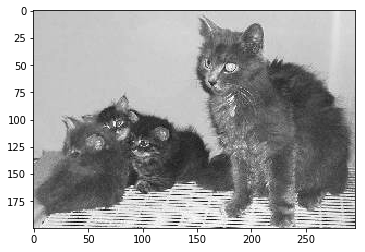

In [304]:
# The directory of the input pictures is really important!
# The wrong directory will cause CV2 resize() error!

main_dir = "data/"
train_dir_cat = "training_set/cats"
train_dir_dog = "training_set/dog"
val_dir ="training_set/val"
test_dir ="test_set/test"
test_dir_cat_only ="test_set/cats"
test_dir_dog_only ="test_set/dogs"

path_cat = os.path.join(main_dir,train_dir_cat)
path_dog = os.path.join(main_dir,train_dir_dog)
path_test= os.path.join(main_dir,test_dir)
path_val=os.path.join(main_dir,val_dir)
path_test_cat_only= os.path.join(main_dir,test_dir_cat_only)
path_test_dog_only=os.path.join(main_dir,test_dir_dog_only)

for p in os.listdir(path_cat):
    if(p==".DS_Store"):
        continue
    category = "cat"
    path_file=path_cat+"/"+p
    
    # To test whether the image directory is correct
    #     print(path_file)
    
    # Read the image into array & Set the image as gray scale
    img_array = cv2.imread(path_file,cv2.IMREAD_GRAYSCALE)
    
    # Resize the input image to specific length and width 
    new_img_array = cv2.resize(img_array, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
    plt.imshow(img_array,cmap="gray")
    if(p=="cat.101.jpg"):
        break


 # Data pre-processing
 If I use larger image dataset, the training time will be too long (current training time is above 45 minutes).
 
 Finally, I chose the datasets with an appropriate size.
 
 For this training dataset, I divided it into two parts: Training Set (75%) and Validation Set (25%)
 
 Training Set: about 3000 images, half cats and half dogs.
 
 Validation Set: about 1000 images, half cats and half dogs
 
 Three Testing Set: Mixed dataset, Cat dataset and dog dataset ( You will see details below ).
 
 For the classification label of the training set, if the image is a cat, the label will be [1,0]. If the image is a dog, the label will be [0,1]. 

### Preprocess the Images Dataset (Training)  

In [305]:
X_train = []
Y_train = []
def create_training_data(path1,path2):
    all_training=[]
    for p in os.listdir(path1):
        if(p==".DS_Store"):
            continue
        path_file=path1+"/"+p
        img_array = cv2.imread(path_file,0)
        new_img_array = cv2.resize(img_array, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_train.append(new_img_array)
        Y_train.append([1,0])
    for p in os.listdir(path2):
        if(p==".DS_Store"):
            continue
        path_file=path2+"/"+p
        img_array = cv2.imread(path_file,0)
        new_img_array = cv2.resize(img_array, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_train.append(new_img_array)
        Y_train.append([0,1])
        
create_training_data(path_cat,path_dog)
X_train = np.array(X_train).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
Y_train = np.array(Y_train)
X_train = X_train/255

In [306]:
print(Y_train)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Preprocess the Images Dataset (Testing)

In [307]:
#Testing dataset (Mixed)
X_test = []
Y_test = []

def create_test_data(path):        
    for p in os.listdir(path):
        if(p==".DS_Store"):
            continue
        category = p.split(".")[0]
        if(category=="cat"):
            category=[1,0]
        else:
            category=[0,1]
        path_file=path+"/"+p
        img_array2 = cv2.imread(path_file,0)
        new_img_array2 = cv2.resize(img_array2, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_test.append(new_img_array2)
        Y_test.append(category)
        
create_test_data(path_test)
X_test = np.array(X_test).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
Y_test = np.array(Y_test)
X_test = X_test/255

In [308]:
#Testing dataset (Cat Only)
X_test_cat=[]
Y_test_cat=[]
def create_test_data1(path):        
    for p in os.listdir(path):
        if(p==".DS_Store"):
            continue
        category = p.split(".")[0]
        if(category=="cat"):
            category=[1,0]
        else:
            category=[0,1]
        path_file=path+"/"+p
        img_array2 = cv2.imread(path_file,0)
        new_img_array2 = cv2.resize(img_array2, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_test_cat.append(new_img_array2)
        Y_test_cat.append(category)

create_test_data1(path_test_cat_only)
X_test_cat = np.array(X_test_cat).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
Y_test_cat = np.array(Y_test_cat)
X_test_cat = X_test_cat/255


In [309]:
#Testing dataset (Dog Only)
X_test_dog=[]
Y_test_dog=[]
def create_test_data2(path):        
    for p in os.listdir(path):
        if(p==".DS_Store"):
            continue
        category = p.split(".")[0]
        if(category=="cat"):
            category=[1,0]
        else:
            category=[0,1]
        path_file=path+"/"+p
        img_array2 = cv2.imread(path_file,0)
        new_img_array2 = cv2.resize(img_array2, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_test_dog.append(new_img_array2)
        Y_test_dog.append(category)
        
create_test_data2(path_test_dog_only)
X_test_dog = np.array(X_test_dog).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
Y_test_dog = np.array(Y_test_dog)
X_test_dog = X_test_dog/255

### Preprocess the Images Dataset (Validation)

In [310]:
X_val=[]
Y_val=[]
classes=["cat","dog"]
def create_val_data(path):
    for p in os.listdir(path):
        if(p==".DS_Store"):
            continue
        category = p.split(".")[0]
        if(category=="cat"):
            category=[1,0]
        elif(category=="dog"):
            category=[0,1]
        path_file=path+"/"+p
        img_array3 = cv2.imread(path_file,0)
        new_img_array3 = cv2.resize(img_array3, dsize=(IMAGE_WIDTH, IMAGE_HEIGHT))
        X_val.append(new_img_array3)
        Y_val.append(category)
        
create_val_data(path_val)
X_val = np.array(X_val).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
Y_val = np.array(Y_val)
X_val = X_val/255


# Build a CNN Model

### Build layers

#### The hidden layers of convolutional neural networks typically consist of convolutional layers, pooling layers, normalization layers and fully connected layers.

Conv2D --> The basic convolutional layer, contains neurons.

MaxPooling --> After every convolution finish, we use MaxPooling to select the max value among sub-pools. In this model, I set down pooling size to 2 * 2

Flatten --> Flatten layer serves as a connection layer between the convolution and dense layer

Dense --> The dense layer will be used for output layer

batch_size --> Batch size is the number of training data in one pass. In this model, I set the batch_size to 64.

dropout --> A simple way to prevent overfitting. Also dropout is a technique where randomly selected neurons are ignored during training. Neurons are randomly be dropped out. In this model, I set dropout rate to 0.5.

The activation functions of this model are ReLU (Rectified Linear Unit) and Softmax.

Generally, the more epoches we run, the more accuracy the model will achieve up to a certain point. For this project, I have to set a small number for epoch and save the model after each run in order to save time since the running time is extremely long.

The running will also be greatly increased if I set the size of image to a large number. In this project, to get more accurate results, I decide to set the image size to (150 * 150). When I started building CNN model, I only created 3 convolutional layers whose filters' sizes are 32,64,128. I didn't get expected prediction results. After many attempts, to increase the accuracy the model can achieve, I am eventually going to use 6 convolutional layers whose filters' sizes are 32,32,64,64,128,128. 



In [352]:
model = Sequential()
# The first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the results
model.add(Flatten())
#Set the hideen layer containing 512 neurons
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#categorical_crossentropy
#binary_crossentropy
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

model.summary()
trained_model = model.fit(X_train, Y_train, epochs=15,validation_data=(X_val, Y_val),verbose=1, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 18, 18, 64)        36928     
__________

# Exploring Process

### Epoch: 20, Batch_size: 64, First Dense Layer: 512 nuerons, 6 Convolutional layers
#### Cannot get expected results
#### Validation loss is much larger than the training loss, which means the neural network might be overfitting. Training acurracy is also much higher than validation accuracy that also means the neural network might be overfitting.

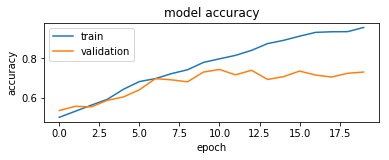

In [182]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

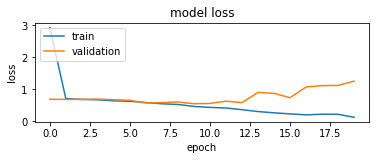

In [183]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

### Epoch: 10, Batch_size: 64, First Dense Layer: 512 nuerons, 6 Convolutional layers
#### Cannot get expected results

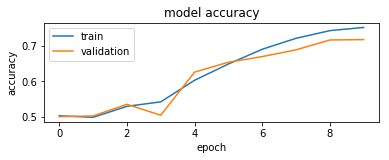

In [185]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

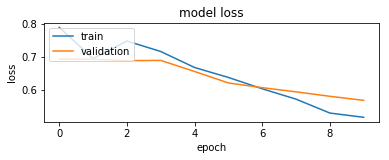

In [186]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

### Epoch: 15, Batch_size: 64, First Dense Layer: 512 nuerons, 6 Convolutional layers
#### Cannot get expected results

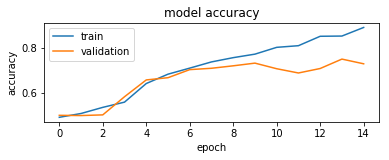

In [214]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

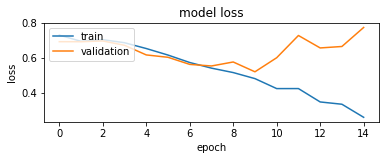

In [215]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

### Epoch: 20, Batch_size: 64, First Dense Layer: 256 nuerons 
#### Cannot get expected results, but improved a little. Overfitting still exists.

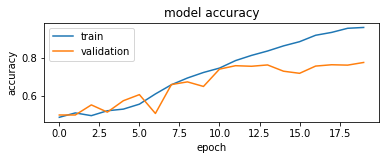

In [260]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

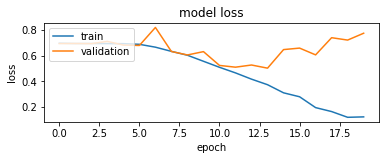

In [261]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

### Epoch: 10, Batch_size: 64, First Dense Layer: 256 nuerons


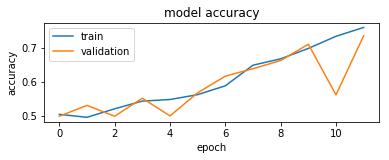

In [330]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

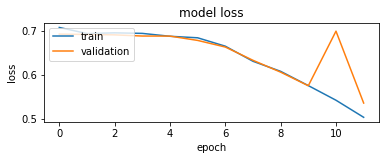

In [331]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

### Epoch: 15, Batch_size: 64, First Dense Layer: 256 nuerons
#### Results of predictions are more accurate than previous models.

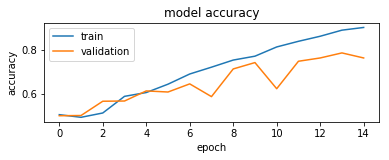

In [353]:
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(trained_model.history['acc'])  
 plt.plot(trained_model.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')  
 plt.show()  

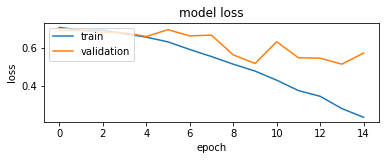

In [354]:
 # summarize history for loss  
 plt.subplot(212)  
 plt.plot(trained_model.history['loss'])  
 plt.plot(trained_model.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()  

# Serialization
Once the model is successfully trained, I will make a backup for the pre-trained model named "cat.h5".

And a json file containning the information of the pre-trained model has been generated as well.

In [368]:
# serialize model to JSON
model_json = model.to_json()
with open("model_num.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save("cat.h5")
print("Saved model to disk")

Saved model to disk


# Make Predictions

#### Use the model we built above to make predictions. 
#### X_test: the mixed dataset contains 22 cat & dog images.
#### X_test_cat: the mixed dataset contains 1003 cat images.
#### X_test_dog: the mixed dataset contains 1013 dog images.

In [356]:
predictions = model.predict(X_test)

In [357]:
predictions_cat_only=model.predict(X_test_cat)

In [358]:
predictions_dog_only=model.predict(X_test_dog)

In [359]:
predicted_val = [p for p in predictions]

In [360]:
predicted_val_cat_only = [p for p in predictions_cat_only]

In [361]:
predicted_val_dog_only = [p for p in predictions_dog_only]

#### To test the how accurate the model can achieve, I have made comparisons between the correct image information and predicted information below. You can see the detailed information for each example image in the testing dataset.
#### The acurracy I got is  57.14% (0.5714285714285714) for mixed dataset. Mixed dataset contains 22 images (cats & dogs).
#### The acurracy I got is  78.04% (0.780439121756487) for cat dataset. Cat dataset contains 1003 cat images.
#### The acurracy I got is  73.02% (0.7302371541501976) for dog dataset. Dog dataset contains 1013 dog images.

In [385]:
total_size=len(predicted_val)
correct_count=0
for i in range(0,len(predicted_val)):
    label=""
    label2=[]
    temp=""
    if Y_test[i][0]==0:
        if Y_test[i][1]==1:
            label="dog"
    else:
        label="cat"
        
    if np.argmax(predicted_val[i])==0:
        label2=[1,0]
        temp="cat"
        
    elif np.argmax(predicted_val[i])==1:
        label2=[0,1]
        temp="dog"
    
    if label==temp:
        correct_count+=1
        
    print('Correct Category:',label,"| Correct Label:",Y_test[i],'| Predicted Value:',predicted_val[i],"| Predicted Label:",label2)
print("Accuracy: ",correct_count/total_size)

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9859196  0.01408036] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.23301505 0.76698494] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99509984 0.00490016] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9975586  0.00244134] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.2621376  0.73786235] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99160117 0.00839884] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.6861598  0.31384018] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.2833947  0.71660537] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9855956  0.01440442] 

In [363]:
total_size=len(predicted_val_cat_only)
correct_count=0
for i in range(0,len(predicted_val_cat_only)):
    label=""
    label2=[]
    temp=""
    if Y_test_cat[i][0]==0:
        if Y_test_cat[i][1]==1:
            label="dog"
    else:
        label="cat"
        
    if np.argmax(predicted_val_cat_only[i])==0:
        label2=[1,0]
        temp="cat"
        
    elif np.argmax(predicted_val_cat_only[i])==1:
        label2=[0,1]
        temp="dog"
    
    if label==temp:
        correct_count+=1
        
    print('Correct Category:',label,"| Correct Label:",Y_test_cat[i],'| Predicted Value:',predicted_val_cat_only[i],"| Predicted Label:",label2)
print("Accuracy: ",correct_count/total_size)

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9859196  0.01408036] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.23301505 0.76698494] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99509984 0.00490016] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9975586  0.00244134] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9956643  0.00433573] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.2621376  0.73786235] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99160117 0.00839884] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.6861598  0.31384018] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.2833947  0.71660537] 

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.79659945 0.20340058] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.997181e-01 2.818029e-04] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.91146094 0.08853903] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.25623092 0.74376905] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.92312676 0.07687329] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.991806e-01 8.193803e-04] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9542906  0.04570935] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9889557  0.01104432] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.20972398 0.79

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9540688  0.04593119] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.1616751  0.83832484] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.98546857 0.01453139] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.5085259 0.4914741] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9915324  0.00846764] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.61530155 0.38469842] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.34849533 0.6515047 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.8471015  0.15289854] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.96527874 0.03472124] | 

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.26175532 0.7382447 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.9939895e-01 6.0109474e-04] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99878913 0.00121086] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.56070894 0.43929103] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.9953151e-01 4.6848145e-04] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9292451  0.07075489] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.8934935  0.10650652] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9925593  0.00744074] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99483156 

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.95836234 0.04163762] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.96600795 0.03399206] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.3667859  0.63321406] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.67598736 0.32401258] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.977692 0.022308] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.1303756 0.8696244] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.9998271e-01 1.7296525e-05] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.49967214 0.50032794] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99120986 0.00879019] 

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.51757675 0.48242322] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.98572063 0.01427931] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.6635964  0.33640364] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.03304568 0.9669543 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.77711946 0.22288053] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.3302573 0.6697427] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.9906164e-01 9.3833281e-04] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.93355006 0.06644994] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.79539186 0.204608

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9880376  0.01196237] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.49688837 0.5031116 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99471045 0.00528954] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.8716953  0.12830468] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.09555668 0.9044433 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.99290365 0.00709639] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.97362804 0.02637191] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.8364698  0.16353022] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [9.9938679e-01 6.1317784

Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9467085  0.05329152] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.7223221 0.2776779] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.690863   0.30913693] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.61844856 0.38155138] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.9870647  0.01293525] | Predicted Label: [1, 0]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.02195157 0.97804844] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.28153658 0.7184634 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.04066068 0.9593393 ] | Predicted Label: [0, 1]
Correct Category: cat | Correct Label: [1 0] | Predicted Value: [0.98645544 0.01354458] | 

In [364]:
total_size=len(predicted_val_dog_only)
correct_count=0
for i in range(0,len(predicted_val_dog_only)):
    label=""
    label2=[]
    temp=""
    if Y_test_dog[i][0]==0:
        if Y_test_dog[i][1]==1:
            label="dog"
    else:
        label="cat"
        
    if np.argmax(predicted_val_dog_only[i])==0:
        label2=[1,0]
        temp="cat"
        
    elif np.argmax(predicted_val_dog_only[i])==1:
        label2=[0,1]
        temp="dog"
    
    if label==temp:
        correct_count+=1
        
    print('Correct Category:',label,"| Correct Label:",Y_test_dog[i],'| Predicted Value:',predicted_val_dog_only[i],"| Predicted Label:",label2)
print("Accuracy: ",correct_count/total_size)

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.9331154  0.06688459] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.6605868 0.3394132] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.04989894 0.95010114] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0168901  0.98310983] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.39567432 0.6043257 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.99447757 0.00552245] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.9318409  0.06815904] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.37727186 0.62272805] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.07733747 0.92266256] | 

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.04248236 0.9575176 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.08944664 0.9105534 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0968658 0.9031342] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.29527816 0.70472187] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.74417555 0.25582448] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.16568936 0.83431065] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.16568936 0.83431065] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0047273 0.9952727] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0583065  0.94169354] | Pr

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.1669055 0.8330945] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.36662737 0.63337266] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.6755804  0.32441962] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.9426329  0.05736708] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.23598208 0.76401794] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.00719647 0.9928035 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.00238693 0.9976131 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.33744344 0.6625565 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0853598 0.9146402] | Pr

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.0814637 0.9185363] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.35894763 0.6410524 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.37989748 0.6201025 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.00961765 0.9903824 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.00442344 0.9955766 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.15574275 0.8442573 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.5390369 0.4609631] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.49774012 0.5022599 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.06387602 0.93612397] | Pr

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.9230846  0.07691539] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.02008829 0.97991174] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.22476119 0.7752388 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.6998324  0.30016765] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.05879692 0.94120306] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.35178927 0.64821076] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.34476402 0.65523595] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.00650473 0.9934953 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.8096487 0.1903513] | 

Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.1377566  0.86224335] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.04376845 0.95623153] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.42535058 0.5746494 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.94387245 0.05612749] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.04072407 0.9592759 ] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.75660306 0.2433969 ] | Predicted Label: [1, 0]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.03670994 0.96329004] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.03670994 0.96329004] | Predicted Label: [0, 1]
Correct Category: dog | Correct Label: [0 1] | Predicted Value: [0.01255424 0.9874457 ] 

# Additional Tests:

### recognition method:  
recognition function do the following steps:

1.Load pre-trained model

2.Read input image and convert it to array form

3.Use the loaded model to predict whether it is a cat or a dog

4.The result of prediction will be [P(cat),P(dog)]. The argmax function in numpy library will tell us which 
probability is bigger.

5.Add the predicted label and corresponding probability on the picture as output file


Users have to put the test picture with .jpg format in the Cat_Recognition folder.

After users run this method, the output will be a new image in .jpg format with a label.

The lable on the new image might be either "cat" or "dog". If P(cat)> P(dog), the image label will be set to "cat". Otherwise, the label will be set to "dog"

In [369]:
def recognition(file):
    temp=[]
    label=""
    # read input image
    image = cv2.imread(file,0)

    if image is None:
        print("Could not read input image")
        exit()

    # Preprocessing
    output = np.copy(image)

    # Load pre-trained model
    model = load_model('cat.h5')

    cat_image = cv2.resize(image,(IMAGE_WIDTH, IMAGE_HEIGHT))
    temp.append(cat_image)
    temp = np.array(temp).reshape(-1,IMAGE_WIDTH, IMAGE_HEIGHT,1)
    temp = temp/255.0

    classes = ["cat","dog"]   
   # Run input image
    confidence = model.predict(temp)[0]
    idx=np.argmax(confidence)

    if idx==0:
        label=classes[0]
        
    elif idx==1:
        label=classes[1]
        
   # write predicted gender and confidence on image (top-left corner) 
    idx = np.argmax(confidence)
    label = classes[idx]
    label = "{} {:.2f}%".format(label, confidence[idx] * 100)
    cv2.putText(output,label,(50,50) ,cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,0,255), 2)

    # print confidence for each class in terminal
    print(confidence)
    print(label)    
    print(idx)

    # save output image
    cv2.imwrite("output.jpg", output)
    
    # release resources
    cv2.destroyAllWindows()

#### In order to visualize the predicted results, I searched some dog pictures and cat pictures online, and randomly picked 15 images to make additional test cases by using "recognition" method.  
#### Results: 14 Correct, 1 Flase. The accuracy is  93.33% (14/15 = 0.93333333 )

[0.97793895 0.02206107]
cat 97.79%
0


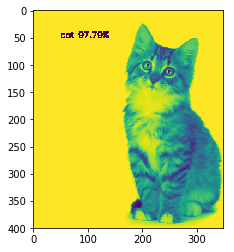

In [370]:
#Correct
recognition("test1.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.9959234  0.00407659]
cat 99.59%
0


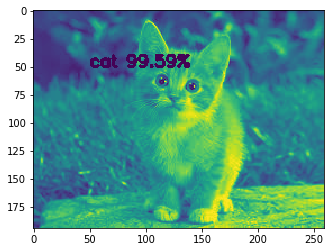

In [371]:
#Correct
recognition("test2.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[9.9918169e-01 8.1825006e-04]
cat 99.92%
0


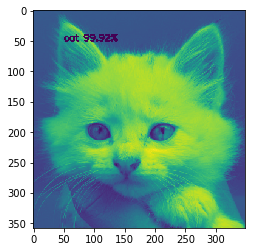

In [372]:
#Correct
recognition("test3.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.00384273 0.9961572 ]
dog 99.62%
1


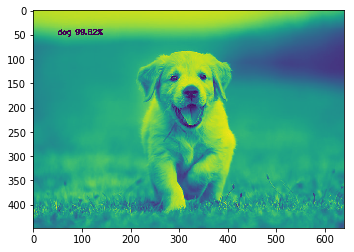

In [373]:
#Correct
recognition("test4.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[4.6653225e-04 9.9953353e-01]
dog 99.95%
1


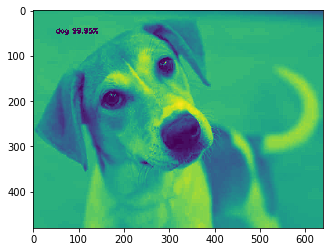

In [374]:
#Correct
recognition("test5.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.7092981  0.29070196]
cat 70.93%
0


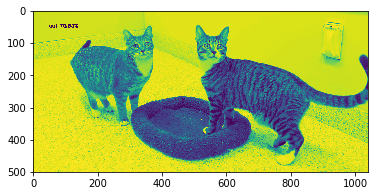

In [375]:
#Correct
recognition("test6.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[9.999237e-01 7.634678e-05]
cat 99.99%
0


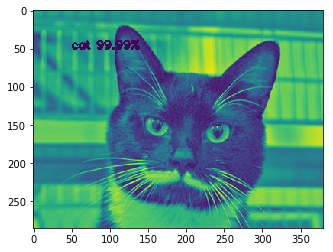

In [376]:
#Correct
recognition("test7.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.29185447 0.70814556]
dog 70.81%
1


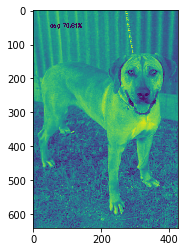

In [377]:
#Correct
recognition("test8.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[1.5323941e-04 9.9984670e-01]
dog 99.98%
1


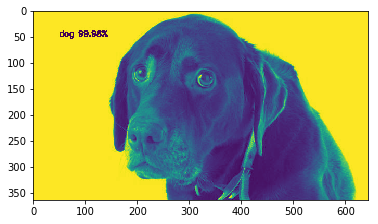

In [378]:
#Correct
recognition("test9.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.08401708 0.9159829 ]
dog 91.60%
1


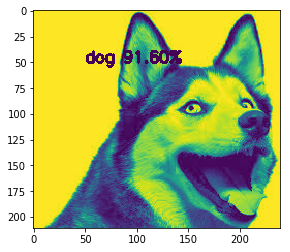

In [379]:
#Correct
recognition("test10.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.8483007  0.15169933]
cat 84.83%
0


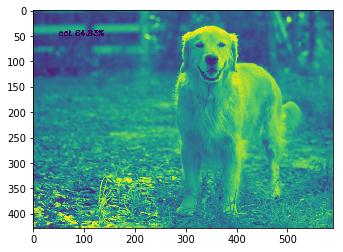

In [380]:
#Wrong
recognition("test11.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.00115903 0.998841  ]
dog 99.88%
1


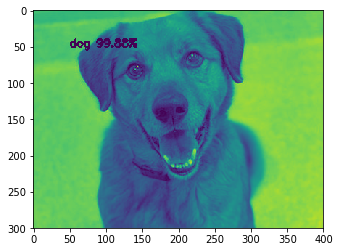

In [381]:
#Correct
recognition("test12.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.9793652  0.02063473]
cat 97.94%
0


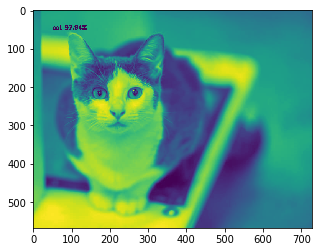

In [382]:
#Correct
recognition("test13.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[0.9107442 0.0892558]
cat 91.07%
0


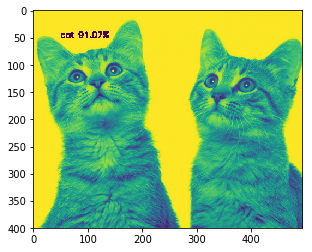

In [383]:
#Correct
recognition("test14.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

[5.0395506e-04 9.9949598e-01]
dog 99.95%
1


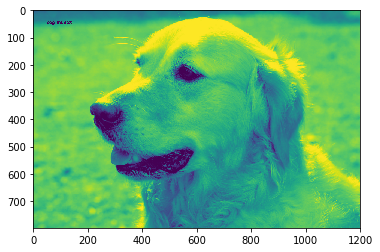

In [384]:
#Correct
recognition("test15.jpg")
img=mpimg.imread('output.jpg')
imgplot = plt.imshow(img)

# Analysis